In [66]:
import requests
import json
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns',100)

In [3]:
#getting teamIDs
url = 'https://statsapi.web.nhl.com/api/v1/teams'
response = requests.get(url)
data= response.json()

In [19]:
data['teams']

[{'id': 1,
  'name': 'New Jersey Devils',
  'link': '/api/v1/teams/1',
  'venue': {'name': 'Prudential Center',
   'link': '/api/v1/venues/null',
   'city': 'Newark',
   'timeZone': {'id': 'America/New_York', 'offset': -4, 'tz': 'EDT'}},
  'abbreviation': 'NJD',
  'teamName': 'Devils',
  'locationName': 'New Jersey',
  'firstYearOfPlay': '1982',
  'division': {'id': 18,
   'name': 'Metropolitan',
   'nameShort': 'Metro',
   'link': '/api/v1/divisions/18',
   'abbreviation': 'M'},
  'conference': {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'},
  'franchise': {'franchiseId': 23,
   'teamName': 'Devils',
   'link': '/api/v1/franchises/23'},
  'shortName': 'New Jersey',
  'officialSiteUrl': 'http://www.newjerseydevils.com/',
  'franchiseId': 23,
  'active': True},
 {'id': 2,
  'name': 'New York Islanders',
  'link': '/api/v1/teams/2',
  'venue': {'id': 5026,
   'name': 'Barclays Center',
   'link': '/api/v1/venues/5026',
   'city': 'Brooklyn',
   'timeZone': {'id': 'America/

In [8]:
list_of_teamIDs = []
for i in data['teams']:
    list_of_teamIDs.append(i['id'])

In [9]:
list_of_teamIDs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 52,
 53,
 54]

In [10]:
# create list of seasonIDs:
list_of_seasonIDs = [str(x) for x in range(1999,2020)]

In [11]:
seasonIDs = []  
i = 0
while i < 20:
    seasonIDs.append(list_of_seasonIDs[i]+list_of_seasonIDs[i+1])
    i += 1

In [14]:
# get rid of lockout season
seasonIDs.pop(5)

'20042005'

In [22]:
seasonIDs

['19992000',
 '20002001',
 '20012002',
 '20022003',
 '20032004',
 '20052006',
 '20062007',
 '20072008',
 '20082009',
 '20092010',
 '20102011',
 '20112012',
 '20122013',
 '20132014',
 '20142015',
 '20152016',
 '20162017',
 '20172018',
 '20182019']

In [23]:
# function that takes in a list of dictionaries where each dictionary is made up of 
# key value pairs where the keys are each teamID and the values are the seasonIDs
# for each team that played in that season's playoffs
def get_regseason_stats(team_list,season_list):
    # empty list to hold our team-level stats 
    team_stats = []
    # iterate through the list of dictionaries
    for team in team_list:
        for season in season_list:
            url = f'https://statsapi.web.nhl.com/api/v1/teams/{team}?expand=team.stats&season={season}'
            print(url)
            response = requests.get(url)
            data = response.json()
            if 'teams' in data.keys():
                team_dict = data['teams'][0]['teamStats'][0]['splits'][0]['stat']
                team_dict['teamID'] = team
                team_dict['seasonID'] = season
                team_stats.append(team_dict)
    return team_stats

In [24]:
all_regular_seasonstats = get_regseason_stats(list_of_teamIDs,seasonIDs)

https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=19992000
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20002001
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20012002
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20022003
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20032004
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20052006
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20062007
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20072008
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20082009
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20092010
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20102011
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&season=20112012
https://statsapi.web.nhl.com/api/v1/teams/1?expand=team.stats&se

https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20122013
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20132014
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20142015
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20152016
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20162017
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20172018
https://statsapi.web.nhl.com/api/v1/teams/6?expand=team.stats&season=20182019
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&season=19992000
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&season=20002001
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&season=20012002
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&season=20022003
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&season=20032004
https://statsapi.web.nhl.com/api/v1/teams/7?expand=team.stats&se

https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20052006
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20062007
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20072008
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20082009
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20092010
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20102011
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20112012
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20122013
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20132014
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20142015
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20152016
https://statsapi.web.nhl.com/api/v1/teams/13?expand=team.stats&season=20162017
https://statsapi.web.nhl.com/api/v1/teams/13?expand=

https://statsapi.web.nhl.com/api/v1/teams/18?expand=team.stats&season=20172018
https://statsapi.web.nhl.com/api/v1/teams/18?expand=team.stats&season=20182019
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=19992000
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20002001
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20012002
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20022003
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20032004
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20052006
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20062007
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20072008
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20082009
https://statsapi.web.nhl.com/api/v1/teams/19?expand=team.stats&season=20092010
https://statsapi.web.nhl.com/api/v1/teams/19?expand=

https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20082009
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20092010
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20102011
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20112012
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20122013
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20132014
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20142015
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20152016
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20162017
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20172018
https://statsapi.web.nhl.com/api/v1/teams/24?expand=team.stats&season=20182019
https://statsapi.web.nhl.com/api/v1/teams/25?expand=team.stats&season=19992000
https://statsapi.web.nhl.com/api/v1/teams/25?expand=

https://statsapi.web.nhl.com/api/v1/teams/30?expand=team.stats&season=20182019
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=19992000
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20002001
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20012002
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20022003
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20032004
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20052006
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20062007
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20072008
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20082009
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20092010
https://statsapi.web.nhl.com/api/v1/teams/52?expand=team.stats&season=20102011
https://statsapi.web.nhl.com/api/v1/teams/52?expand=

In [25]:
import json
with open('all_regular_seasonstats.json','w') as team_stats_file:
    json.dump(all_regular_seasonstats, team_stats_file)

In [28]:
all_regular_seasonstats[0]

{'gamesPlayed': 82,
 'wins': 45,
 'losses': 24,
 'ot': 5,
 'pts': 103,
 'ptPctg': '62.8',
 'goalsPerGame': 3.061,
 'goalsAgainstPerGame': 2.476,
 'evGGARatio': 0.9286,
 'powerPlayPercentage': '20.1',
 'powerPlayGoals': 55.0,
 'powerPlayGoalsAgainst': 39.0,
 'powerPlayOpportunities': 274.0,
 'penaltyKillPercentage': '87.5',
 'shotsPerGame': 33.1341,
 'shotsAllowed': 25.622,
 'winScoreFirst': 0.622,
 'winOppScoreFirst': 0.459,
 'winLeadFirstPer': 0.7,
 'winLeadSecondPer': 0.882,
 'winOutshootOpp': 0.587,
 'winOutshotByOpp': 0.471,
 'faceOffsTaken': 5195.0,
 'faceOffsWon': 2563.0,
 'faceOffsLost': 2632.0,
 'faceOffWinPercentage': '49.3',
 'shootingPctg': 9.2,
 'savePctg': 0.903,
 'teamID': 1,
 'seasonID': '19992000'}

In [31]:
df = pd.DataFrame(all_regular_seasonstats)

In [32]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed,goalsAgainstPerGame,goalsPerGame,losses,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,seasonID,shootingPctg,shotsAllowed,shotsPerGame,teamID,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins
0,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,19992000,9.2,25.6220,33.1341,1,0.700,0.882,0.459,0.587,0.471,0.622,45
1,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,20002001,11.4,24.6829,31.5854,1,0.839,0.921,0.421,0.583,0.684,0.727,48
2,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,20012002,8.4,23.1707,29.8171,1,0.750,0.774,0.275,0.452,0.632,0.714,41
3,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,20022003,8.3,23.5732,31.7195,1,0.821,0.846,0.353,0.523,0.692,0.708,46
4,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,20032004,8.8,24.4024,29.6707,1,0.821,0.842,0.176,0.559,0.500,0.771,43


In [44]:
df['teamID'] = df['teamID'].astype(str)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 30 columns):
evGGARatio                545 non-null float64
faceOffWinPercentage      545 non-null object
faceOffsLost              545 non-null float64
faceOffsTaken             545 non-null float64
faceOffsWon               545 non-null float64
gamesPlayed               545 non-null int64
goalsAgainstPerGame       545 non-null float64
goalsPerGame              545 non-null float64
losses                    545 non-null int64
ot                        545 non-null int64
penaltyKillPercentage     545 non-null object
powerPlayGoals            545 non-null float64
powerPlayGoalsAgainst     545 non-null float64
powerPlayOpportunities    545 non-null float64
powerPlayPercentage       545 non-null object
ptPctg                    545 non-null object
pts                       545 non-null int64
savePctg                  545 non-null float64
seasonID                  545 non-null object
shootingPctg   

In [46]:
df['teamID_seasonID'] = df['teamID'].str.cat(df['seasonID'], sep = "_")


In [49]:
df.set_index('teamID_seasonID',inplace=True)

In [50]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed,goalsAgainstPerGame,goalsPerGame,losses,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,seasonID,shootingPctg,shotsAllowed,shotsPerGame,teamID,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,19992000,9.2,25.6220,33.1341,1,0.700,0.882,0.459,0.587,0.471,0.622,45
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,20002001,11.4,24.6829,31.5854,1,0.839,0.921,0.421,0.583,0.684,0.727,48
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,20012002,8.4,23.1707,29.8171,1,0.750,0.774,0.275,0.452,0.632,0.714,41
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,20022003,8.3,23.5732,31.7195,1,0.821,0.846,0.353,0.523,0.692,0.708,46
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,20032004,8.8,24.4024,29.6707,1,0.821,0.842,0.176,0.559,0.500,0.771,43


In [51]:
df.drop(['teamID','seasonID'],axis=1,inplace=True)

In [52]:
df.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed,goalsAgainstPerGame,goalsPerGame,losses,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43


In [53]:
df.to_csv('NHL_regularstats.csv')

In [54]:
len(df)

545

In [55]:
df2 = pd.read_csv('NHL_defense_stats.csv')

In [56]:
df_NHL = pd.merge(df,df2,on='teamID_seasonID')

In [58]:
len(df_NHL)

545

In [60]:
df_NHL.to_csv('Final_NHL_stats.csv')

In [63]:
df_NHL.set_index('teamID_seasonID',inplace=True)

In [74]:
df_NHL.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,ot,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,faceoffWinPctg,faceoffs,faceoffsLost,faceoffsWon,gamesPlayed_y,giveaways,goalsFor,hits,losses_y,missedShots,otLosses,points,shootingPctg_y,shotsFor,takeaways,teamAbbrev,teamFullName,ties,wins_y
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,5,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,0.4933,5195,2632,2563,82,984,251,2146,24,1262,5,103,0.0923,2717,1258,NJD,New Jersey Devils,8,45
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,3,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,0.4938,5259,2662,2597,82,1011,295,2027,19,1198,3,111,0.1138,2590,1015,NJD,New Jersey Devils,12,48
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,4,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,0.4951,5156,2603,2553,82,888,205,1983,28,1155,4,95,0.0838,2445,898,NJD,New Jersey Devils,9,41
1_20022003,1.3684,50.7,2467.0,5002.0,2535.0,82,2.024,2.634,20,6,87.8,36.0,32.0,303.0,11.9,65.9,108,0.914,8.3,23.5732,31.7195,0.821,0.846,0.353,0.523,0.692,0.708,46,303,0.5067,5002,2467,2535,82,270,216,487,20,371,6,108,0.0830,2601,214,NJD,New Jersey Devils,10,46
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,2,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,0.4920,4916,2497,2419,82,1073,213,928,25,974,2,100,0.0875,2433,619,NJD,New Jersey Devils,12,43


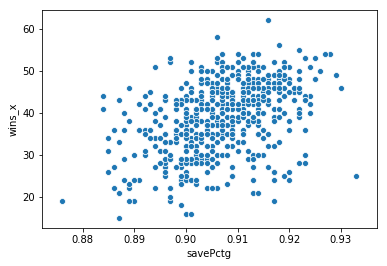

In [77]:
ax = sns.scatterplot(x="savePctg", y="wins_x", data=df_NHL)